In [174]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# System parameters
gamma_20 = .01  # Decay rate from |2> to |0>
gamma_10 = 4.  # Decay rate from |1> to |0>
Omega_01 = 1.0  # Rabi frequency for |0> <-> |1>
Omega_02 = .1  # Rabi frequency for |0> <-> |2>

Delta_1 = .0
Delta_2 = .0

# Basis states
basis_0 = basis(3, 0)
basis_1 = basis(3, 1)
basis_2 = basis(3, 2)

# Operators
sigma_01 = basis_0 * basis_1.dag()
sigma_10 = basis_1 * basis_0.dag()
sigma_02 = basis_0 * basis_2.dag()
sigma_20 = basis_2 * basis_0.dag()

# Hamiltonian: driving terms
H = ( Delta_1 * basis_1 * basis_1.dag() + Delta_2 * basis_2 * basis_2.dag() 
    + Omega_01 * (sigma_01 + sigma_10)  #coherent drive 1-0 (not used now)
    + Omega_02 * (sigma_02 + sigma_20)  #coherent drive 2-0 (that stimulate the quantum jumps!)
)

# Collapse operators (quantum jumps)
c_ops = [
    np.sqrt(gamma_20) * sigma_02,  # |2> -> |0>
    np.sqrt(gamma_10) * sigma_01,  # |1> -> |0>
    0*Omega_01**.5 * sigma_01.dag()  # |0> -> |1> incoherent pump term
]

# Initial state: excited state |2>
psi0 = basis_0

# Observables: populations
proj_0 = basis_0 * basis_0.dag()
proj_1 = basis_1 * basis_1.dag()
proj_2 = basis_2 * basis_2.dag()

In [ ]:
# Time grid
tlist = np.linspace(0, 300, 1000)
# Run Monte Carlo simulation (quantum trajectories)
ntraj = 50  # Number of trajectories
options = Options(atol=1e-6, norm_t_tol=1e-7, norm_tol=1e-4)
result = mcsolve(
    H, psi0, tlist, c_ops, e_ops=[proj_0, proj_1, proj_2], ntraj=ntraj,  options=options  #sometimes this algorithm fails, then just re-start it, maybe adjust parameters
)

# Averages over trajectories
p0 = result.expect[0]
p1 = result.expect[1]
p2 = result.expect[2]

# Plotting
plt.figure(figsize=(8,5))
plt.plot(tlist, p0, label=r'Population |0⟩', color='black')
plt.plot(tlist, p1, label=r'Population |1⟩', color='blue')
plt.plot(tlist, p2, label=r'Population |2⟩', color='red')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title(f'Quantum Jumps Simulation ({ntraj} trajectories)')
plt.grid()
plt.show()

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:   0.23s


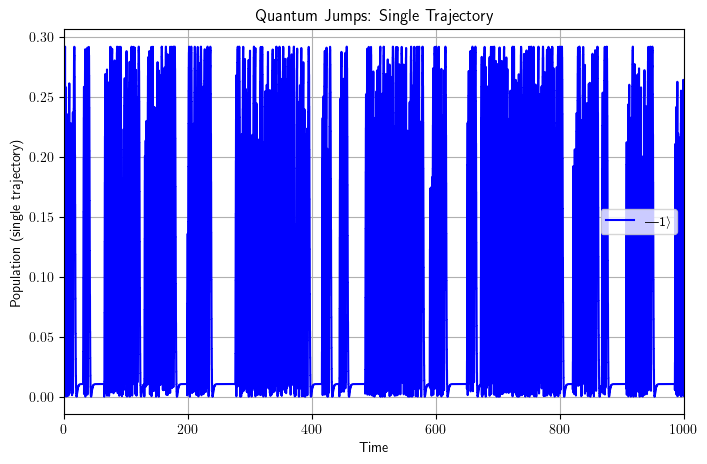

In [177]:
tlist = np.linspace(0, 1000, 8000)

# Optional: visualize a single trajectory
options = Options(atol=1e-6, norm_t_tol=1e-7, norm_tol=1e-4)
single_traj = mcsolve(
    H, psi0, tlist, c_ops, e_ops=[proj_0, proj_1, proj_2], ntraj=1,  options=options
)

plt.figure(figsize=(8,5))
#plt.step(tlist, single_traj.expect[0], label=r'|0⟩')
plt.step(tlist, single_traj.expect[1], label=r'|1⟩', color='blue')
#plt.step(tlist, single_traj.expect[2], label=r'|2⟩')
plt.xlabel('Time')
plt.ylabel('Population (single trajectory)')
plt.legend()
plt.title('Quantum Jumps: Single Trajectory')
plt.grid()
plt.show()